<a href="https://colab.research.google.com/github/soumo40/Analytics/blob/main/AnalyticsGC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analytics GC**
#### **The following code was written during the Analytics GC 2022. The goal was to predict the variable y based on the opening, closing, high and low prices for a financial instrument.**

## **Preprocessing and EDA**

###**1. Importing important libraries**

In [ ]:
import numpy as np                       #For efficient numerical calculations
import matplotlib.pyplot as plt          #For plotting
import seaborn as sns                    #For advanced plotting
import pandas as pd                      #For working on dataframes

### **2. Reading the data**

In [ ]:
df = pd.read_csv('Extract.xlsx - Sheet1.csv',sep = ',')
df.sample(5)

,y,x1,x2,x3,x4
3289,1,3948.88,3949.22,3948.72,3948.91
7054,1,3782.28,3782.69,3782.13,3782.44
8729,0,3759.22,3759.47,3758.97,3759.31
7870,0,3771.63,3773.41,3771.56,3773.19
3402,0,3945.97,3946.34,3945.66,3945.84


The **feature variables** in the dataset are: **x1**, **x2**, **x3** and **x4** which are **open**, **high**, **low** and **close** respectively.
The target variable is **y**.

###**3. Detecting if there are any duplicate data**

In [ ]:
df.duplicated()                       # This function will display 'True' in there are any duplicate or else 'False'

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [ ]:
# In the previous code we cannot see all the data, so here we are taking the sum of all 'True'
df.duplicated().sum()                

0

As the sum is coming zero in the above code, we can confirm there is no duplicate data.

###**4. Detecting if there are any missing or 'NaN' or 'Inf' value**<br>
It is important because model will not be trained for these values

In [ ]:
df.shape                              # Shape of the data set

(10000, 5)

In [ ]:
df.info()                             # This function counts number of non null characters in each cells

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       10000 non-null  int64  
 1   x1      10000 non-null  float64
 2   x2      10000 non-null  float64
 3   x3      10000 non-null  float64
 4   x4      10000 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 390.8 KB


From the above output, we can there are some missing data, so we are caculating the percentage of missing data. Because if percentage of missing data is more than **60%**, we have to drap that particular column.

###**5. Detecting Outliers in our data**

In [ ]:
from scipy.stats import zscore
for column in df[['x1', 'x2', 'x3', 'x4']] :
  df[column + 'balance_outliers'] = df[column]

  df[column + 'balance_outliers']= zscore(df[column + 'balance_outliers']) #Creating an extra column with z scores and eliminating rows based on that


  condition = (df[column + 'balance_outliers']>3) | (df[column + 'balance_outliers']<-3 )

  df = df.drop(df[condition].index, axis = 0)
df.head()

,y,x1,x2,x3,x4,x1balance_outliers,x2balance_outliers,x3balance_outliers,x4balance_outliers
0,0,3861.22,3861.66,3860.75,3861.38,0.021087,0.017511,0.024754,0.023417
1,0,3861.19,3861.38,3860.16,3861.25,0.020658,0.013503,0.016316,0.021557
2,0,3861.38,3861.38,3858.47,3858.53,0.023376,0.013503,-0.007854,-0.017363
3,1,3858.72,3858.72,3857.03,3858.19,-0.014685,-0.024569,-0.028448,-0.022228
4,1,3858.09,3859.16,3858.03,3858.81,-0.023699,-0.018272,-0.014146,-0.013357


In [ ]:
df = df.drop(['x1balance_outliers', 'x2balance_outliers', 'x3balance_outliers', 'x4balance_outliers'], axis = 1)
df

,y,x1,x2,x3,x4
0,0,3861.22,3861.66,3860.75,3861.38
1,0,3861.19,3861.38,3860.16,3861.25
2,0,3861.38,3861.38,3858.47,3858.53
3,1,3858.72,3858.72,3857.03,3858.19
4,1,3858.09,3859.16,3858.03,3858.81
...,...,...,...,...,...
9995,0,3794.75,3795.00,3793.75,3794.88
9996,1,3794.78,3795.09,3794.53,3794.72
9997,0,3794.75,3795.09,3794.47,3794.91
9998,1,3794.94,3795.13,3793.38,3794.34


### **6. Plotting different relationships**

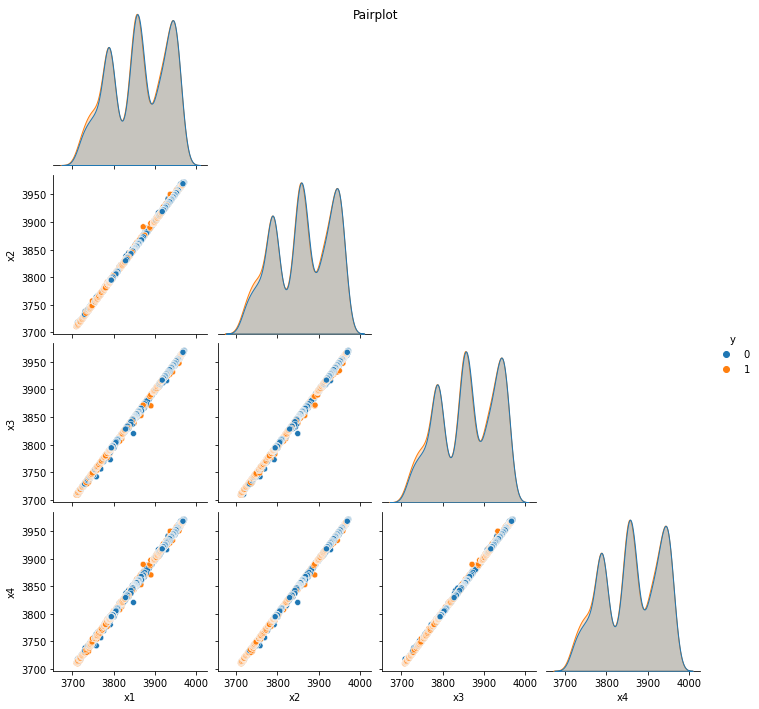

In [ ]:
sns.pairplot(df,x_vars=['x1','x2','x3','x4'],
             y_vars= ['x1','x2','x3','x4'],
             hue='y',corner=True)
plt.suptitle('Pairplot')

plt.show()

From the above graphs, we can see that the feature variables are strongly co-related. The hue confirms that the feature variables may not be significantly affecting y. We plot the heatmap to confirm the same.

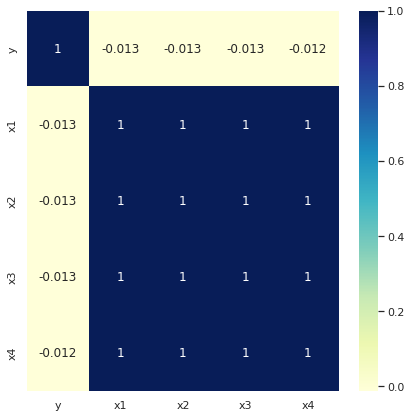

In [ ]:
sns.set(rc={"figure.figsize":(7, 7)})
ax = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

###**7. Calculation of Moving average**

From above figures, we can see that the target variable is not greatly correlated with the feature variables. So, we perform the moving average to the dataset to see if there is any significant increase in the correlations.

In [ ]:
list_df = []

for column in df[['x1', 'x2', 'x3', 'x4']] :

    
   df2 = df[column].to_frame()  
   df2[column+'_avg'] = df2[column].rolling(30).mean()
   df2.dropna(inplace=True)
   list_df.append(df2)   
df3 = list_df[0]
for i in range(1, 4) : 
  df3 = pd.concat([list_df[i],df3], axis=1)
df4 = df3.drop(['x1','x2', 'x3', 'x4'], axis = 1)
df4

,x4_avg,x3_avg,x2_avg,x1_avg
29,3862.489333,3861.620667,3863.169667,3862.322333
30,3862.651667,3861.796667,3863.339333,3862.503667
31,3862.822667,3861.989333,3863.508000,3862.674333
32,3863.103000,3862.237333,3863.697333,3862.839667
33,3863.445667,3862.563333,3864.028667,3863.117667
...,...,...,...,...
9995,3792.464000,3791.964000,3792.816667,3792.309000
9996,3792.625333,3792.126333,3792.982000,3792.471333
9997,3792.815000,3792.303333,3793.149667,3792.631667
9998,3792.957667,3792.445000,3793.313333,3792.824333


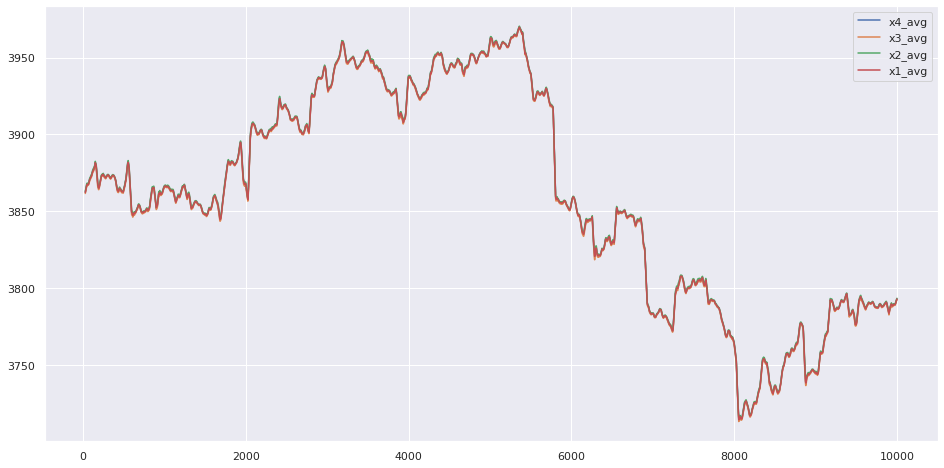

In [ ]:
df4.plot(label='Moving avg', figsize=(16, 8))
plt.show()

In [ ]:
df5 = pd.concat([df4, df.y], axis = 1)
df5.corr()

,x4_avg,x3_avg,x2_avg,x1_avg,y
x4_avg,1.000000,0.999992,0.999992,0.999994,-0.009627
x3_avg,0.999992,1.000000,0.999974,0.999989,-0.009649
x2_avg,0.999992,0.999974,1.000000,0.999993,-0.009532
x1_avg,0.999994,0.999989,0.999993,1.000000,-0.009524
y,-0.009627,-0.009649,-0.009532,-0.009524,1.000000


From above table we see that the correlation have decreased, which might be because there is loss of characteristics of the data. We perform a preliminary analysis with this data.

###**7. a) Importing important libraries**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn import metrics

###**7. b) Model formulation**
For training our data, we drop the first 30 data as they have null values.

In [ ]:
df6 = df5.drop(df5.index[range(30)])
df6.head(5)

,x4_avg,x3_avg,x2_avg,x1_avg,y
30,3862.651667,3861.796667,3863.339333,3862.503667,1
31,3862.822667,3861.989333,3863.508000,3862.674333,1
32,3863.103000,3862.237333,3863.697333,3862.839667,1
33,3863.445667,3862.563333,3864.028667,3863.117667,1
34,3863.819667,3862.907000,3864.396333,3863.462667,0


Performing train-test split.

In [ ]:
X = df6.drop(['y'], axis = 1)
Y = df6.y
m = 0.1
seed = 10
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = m,random_state = seed)

###**7. c) Grid search Algorithm to find best model**

In [ ]:
model_params = {
    'Logistic_Regression': {
       'model': LogisticRegression(),
        'params' : {
    }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
                 'max_depth'    : [4,6,8,10],
                 'max_features': ['auto', 'sqrt', 'log2']
            
        }
    },
    'Decision_tree' : {
        'model': DecisionTreeClassifier(),
        'params': {

                  'max_depth'    : [4,6,8,10,12]
        }
    },
    'KNeighbors' : {
        'model': KNeighborsClassifier(),
        'params': {

                  
        }
    }
}
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, Y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_gridcv = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_gridcv

,model,best_score,best_params
0,Logistic_Regression,0.504625,{}
1,random_forest,0.507968,"{'max_depth': 10, 'max_features': 'auto'}"
2,Decision_tree,0.500167,{'max_depth': 12}
3,KNeighbors,0.509306,{}


From the above analysis, we cannot find a good model score for any algorithms. Hence we proceed to more data processing.

###**8. a) Finding momentum of the stocks**

 Next we perform the momentum analysis of the stocks in order to find better results.<br><br>
 **Momentum(For A particular stock) = Close Price(Today) - Close Price(N-day ago)** <br><br>
 We divide the momentum by mean to scale the data.

In [ ]:
df['momentum'] = np.zeros(len(df['x1']))

In [ ]:
for m in range(30,10000):
  i_today = m
  i = m-30
  df.iloc[i_today,5]=(df.iloc[i_today,4]-df.iloc[i,4])/np.mean(np.array(df.iloc[i:i_today,4]))

In [ ]:
df7 = pd.concat([df.momentum, df.x1, df.x2, df.x3, df.x4, df.y],axis=1)
df7.head(5)

,momentum,x1,x2,x3,x4,y
0,0.0,3861.22,3861.66,3860.75,3861.38,0
1,0.0,3861.19,3861.38,3860.16,3861.25,0
2,0.0,3861.38,3861.38,3858.47,3858.53,0
3,0.0,3858.72,3858.72,3857.03,3858.19,1
4,0.0,3858.09,3859.16,3858.03,3858.81,1


In [ ]:
df8 = df7.drop(df7.index[range(30)])
df8.head(5)

,momentum,x1,x2,x3,x4,y
30,0.001261,3866.66,3866.75,3866.03,3866.25,1
31,0.001328,3866.31,3866.44,3865.94,3866.38,1
32,0.002177,3866.34,3867.06,3865.91,3866.94,1
33,0.002661,3867.06,3868.66,3866.81,3868.47,1
34,0.002904,3868.44,3870.19,3868.34,3870.03,0


###**8. b) Model Formulation**

In [ ]:
X2 = df8.drop(['y'], axis = 1)
m = 0.1
seed = 10
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(X2,df8.y,test_size = m,random_state = seed)

###**8. c) Grid search algorithm**

In [ ]:
model_params2 = {
    'Logistic_Regression': {
       'model': LogisticRegression(),
        'params' : {
    }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
                 'max_depth'    : [4,6,8,10],
                 'max_features': ['auto', 'sqrt', 'log2']
            
        }
    },
    'Decision_tree' : {
        'model': DecisionTreeClassifier(),
        'params': {

                  'max_depth'    : [4,6,8,10,12]
        }
    },
    'KNeighbors' : {
        'model': KNeighborsClassifier(),
        'params': {

                  
        }
    }
}
scores2 = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train2, Y_train2)
    scores2.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_gridcv2 = pd.DataFrame(scores2,columns=['model','best_score','best_params'])
df_gridcv2

,model,best_score,best_params
0,Logistic_Regression,0.541512,{}
1,random_forest,0.508971,"{'max_depth': 4, 'max_features': 'sqrt'}"
2,Decision_tree,0.511199,{'max_depth': 8}
3,KNeighbors,0.513763,{}


Here we can see that any of the model have not performed very well. But we can see Logistic Regression model has the best score of upto **54.1%**. So, we proceed with the testing data with this model.

In [ ]:
lr = LogisticRegression()
lr.fit(X_train2,Y_train2)

LogisticRegression()

###**9. Testing score with Logistic Regression**

In [ ]:
# Predicting target variables with testing dataset
predict = lr.predict(X_test2)

In [ ]:
print(accuracy_score(Y_test2,predict))

0.5346038114343029


In [ ]:
# Printing Roc-auc score
predictions = lr.predict(X_test2)
roc_auc_score(Y_test2, predictions)

0.5349744060266564

In [ ]:
print(metrics.confusion_matrix(Y_test2, predictions))
# Printing the precision and recall, among other metrics
print(metrics.classification_report(Y_test2, predictions))

[[231 270]
 [194 302]]
              precision    recall  f1-score   support

           0       0.54      0.46      0.50       501
           1       0.53      0.61      0.57       496

    accuracy                           0.53       997
   macro avg       0.54      0.53      0.53       997
weighted avg       0.54      0.53      0.53       997



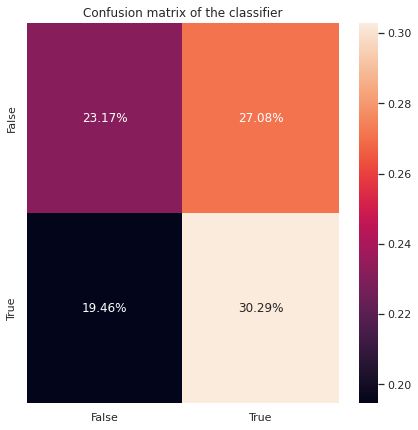

In [ ]:
# Plotting the confusion matrix
cm = metrics.confusion_matrix(Y_test2, predictions)
ax = sns.heatmap(cm/np.sum(cm), annot=True, fmt='0.2%')
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.title('Confusion matrix of the classifier')
plt.show()

###**10. Remarks**<br>
From the above analysis we arrive at the following conclusions:<br>
i) We trained our model with different classification algorithm like **logistic regression**, **random forest classifier**, **decision tree classifier** and **KNN classifier**. Accuracy scores from these models showed that logistic regression was more efficient as compared to the rest.<br>
ii) The **F1 score** for y as 1 is **0.57** and 0 is **0.50**. Here we can conclude that our model shows better performance while identifying the true positives as compared to the true negatives.<br>
iii) The accuracy of our model is moderate **(0.54)**. OHLC being a random statistics, it is hard to obtain a higher accuracy score.<br>
iv) From the **roc-auc score** which is slightly higher than **0.5** indicates that our model trained moderately.